# Project: Investigate a Dataset - [TMDb Movie DataSet]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
The DataSet was obtained from [Kagle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?resource=download) and it contains information about 5000 movies including their budget and revenue. Column names include budget, genre, homepage, id, keywords, original_language, overview, popularity, production_companies, production_countries, release_date, revenue, runtime, spoken_languages, status, tagline, title, vote_average, and vote_count. Each column name gives specific information about the film. The homepage shows the official website for the movie while keywords explain adjectives that best describe the film. Popularity is an integer value that shows rates how the movie was received by viewers with higher values signifying more popularity. 

### Question(s) for Analysis
1. Is adjusted movie revenue dependent on the adjusted movie budget, popularity, and vote average?

First, we import the libraries that we will need in order to carry out this analysis

In [3]:
import pandas as pd
% matplotlib inline
import numpy as np

UsageError: Line magic function `%` not found.


Next, we upgrade pandas to use the dataframe.explode() function

In [ ]:
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling
Next, the csv file containing the Dataset will be loaded and scanned for any missing values, duplicates values, or wrong data type. The data will the be cleaned before further exploration is done.

In [ ]:
df = pd.read_csv("Database_TMDb_movie_data/tmdb-movies.csv")
df.head()


### Data Cleaning
This process will involve going through the data and finding inconsistencies. Any inconsistency will then be addressed. In the first step, we use the info() function to identify if there are any missing values and whether data types are consistent

In [ ]:
df.info()

It is evident that there are many columns that have missing values. These columns include cast, homepage, director, tagline, keywords, overview, genre, and production_companies. Since these values are not particularly essential to our analysis, we can drop them. To do so, we will first need to create a new variable that will hold the truncated data set. Then, we use the DataFrame function to store the original data in the new variable. Lastly, the drop function is invoked along with the arguments that contain the names of the columns we want to drop.

In [18]:
df_new = pd.DataFrame(df)
df_new.drop(["cast", "homepage", "director", "tagline", "keywords", "overview", "genres", "production_companies"], axis = 1, inplace = True)
df_new.head()

,id,imdb_id,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


The next step is to check for duplicate data and to drop the columns that contain duplicated data. To accomplish this, we first find the sum of all duplicate rows using the sum() function then we drop the rows with drop_duplicates() function.

In [34]:
sum(df_new.duplicated())
# we have one duplicate row
df_new.drop_duplicates(inplace = True)
sum(df_new.duplicated())
# now we have 0 duplicates

0

Notice how some rows have a budget and revenue value of 0? This does not make much sense at all and it would be helpful if we could delete such rows. To accomplish this, we use the all() function in the following way.

In [38]:
df_new = df_new[(df_new[['budget','revenue']] != 0).all(axis=1)]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 13 columns):
id                3854 non-null int64
imdb_id           3854 non-null object
popularity        3854 non-null float64
budget            3854 non-null int64
revenue           3854 non-null int64
original_title    3854 non-null object
runtime           3854 non-null int64
release_date      3854 non-null object
vote_count        3854 non-null int64
vote_average      3854 non-null float64
release_year      3854 non-null int64
budget_adj        3854 non-null float64
revenue_adj       3854 non-null float64
dtypes: float64(4), int64(6), object(3)
memory usage: 421.5+ KB


<a id='eda'></a>
## Exploratory Data Analysis

In this section we explore the determinants or factors that contribute to the adjusted revenue from a movie. The dependent variable is the adjusted revenue whereas the indepenent variables are the adjusted budget, vote_average, and popularity. 
> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Is adjusted movie revenue dependent on the adjusted movie budget, popularity, and vote average?)

Let us first explore each variable to gain better insights. This can be accomplished by assigning our explanatory and explained variables to new variable names. The describe() function is then used to get statistics about the data.

In [50]:
df_budget = df_new["budget_adj"]
df_revenue = df_new["revenue_adj"]
df_popularity = df_new["popularity"]
df_vote_average = df_new["vote_average"]
df_new.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,6073.500000,0.462368,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


Next, we can plot two kinds of visual diagrams to help us understand how each of the selected variables is distributed. From the budget histogram we learn that most movies had a low budget and only a few of them had expensive budgets.

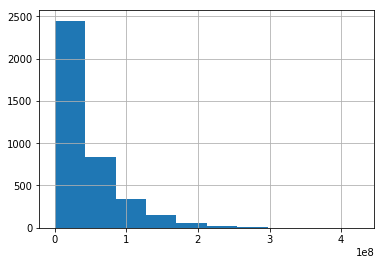

In [47]:
df_budget.hist();

Next we analyze the popularity variable and we find that most movies had a popularity of less than 5 while very few had a popularity of above 10.

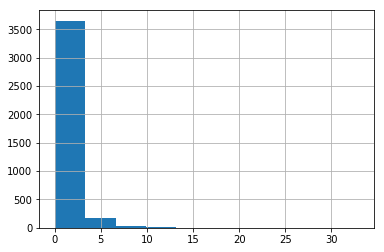

In [48]:
df_popularity.hist();

The Vote average is more normally distributed with the mode being 6.5.

0    6.5
dtype: float64


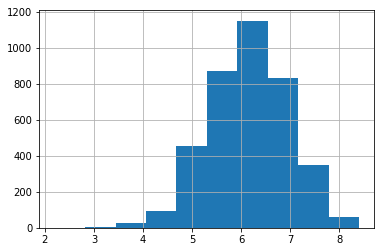

In [55]:
df_vote_average.hist();
print(df_vote_average.mode())

Lastly, our dependent variable adjusted revenue is also skewed to the left with very few movies having a high revenue. 

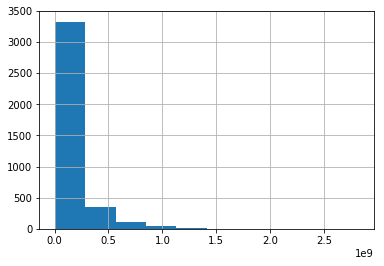

In [56]:
df_revenue.hist();

Our analysis goes further to investigate the relationship between adjusted revenue and each of the independent variables.

### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])